# FINAL PROJECT
# Assignment-II: Breast Cancer Detection

## Name: Payal Chatterjee

## Program: Deep Learning Using Computer Vision Internship Program

## Batch: December 2021

In [1]:
# Importing packages
import numpy as np 
import pandas as pd
import os 
import cv2 as cv2
from matplotlib import pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 

In [2]:
# IDC Dataset
dataset = r"C:\Users\Admin\TCR Innovation Internship\TCRinternship_FinalProject_Payal Chatterjee\BreastCancerDataset_1\8863"
Yes_path = r"C:\Users\Admin\TCR Innovation Internship\TCRinternship_FinalProject_Payal Chatterjee\BreastCancerDataset_1\8863\1" # IDC
No_path = r"C:\Users\Admin\TCR Innovation Internship\TCRinternship_FinalProject_Payal Chatterjee\BreastCancerDataset_1\8863\0" # No IDC

(50, 50, 3)


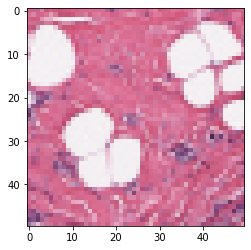

In [3]:
img = cv2.imread(Yes_path+'\8863_idx5_x1001_y801_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Checking the size of the image

(50, 50, 3)


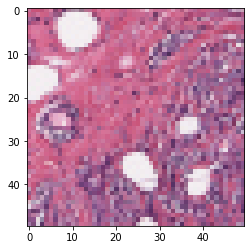

In [4]:
img = cv2.imread(Yes_path+'\8863_idx5_x1001_y851_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Checking the size of the image

In [5]:
vals1 = [Yes_path, No_path]
print(os.listdir(vals1[0]).__len__()) # No. of images in 'yes' folder
print(os.listdir(vals1[1]).__len__()) # No. of images in 'no' folder

207
772


In [6]:
# Here we are providing each of the images in folders 'yes' and 'no' with labels 'yes' and 'no'
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = [] 
labels = [] 
for i, j in zip(pathdir, classes): 
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['8863_idx5_x1001_y1501_class1.png', '8863_idx5_x1001_y1551_class1.png', '8863_idx5_x1001_y1601_class1.png', '8863_idx5_x1001_y801_class1.png', '8863_idx5_x1001_y851_class1.png', '8863_idx5_x1001_y901_class1.png', '8863_idx5_x1001_y951_class1.png', '8863_idx5_x1051_y1001_class1.png', '8863_idx5_x1051_y1051_class1.png', '8863_idx5_x1051_y1101_class1.png', '8863_idx5_x1051_y1151_class1.png', '8863_idx5_x1051_y1501_class1.png', '8863_idx5_x1051_y1551_class1.png', '8863_idx5_x1051_y1601_class1.png', '8863_idx5_x1051_y1651_class1.png', '8863_idx5_x1051_y801_class1.png', '8863_idx5_x1051_y851_class1.png', '8863_idx5_x1051_y901_class1.png', '8863_idx5_x1051_y951_class1.png', '8863_idx5_x1101_y1001_class1.png', '8863_idx5_x1101_y1051_class1.png', '8863_idx5_x1101_y1101_class1.png', '8863_idx5_x1101_y1151_class1.png', '8863_idx5_x1101_y1451_class1.png', '8863_idx5_x1101_y1501_class1.png', '8863_idx5_x1101_y1551_class1.png', '8863_idx5_x1101_y1601_class1.png', '8863_idx5_x1101_y1651_class1.png',

In [7]:
print(filepaths[0:4])
# printing the filepaths from index 0 to 4
print(labels[0:4])
# printing the labels from index 0 to 4

print(filepaths[-4:])
# printing last 4 filepaths
print(labels[-4:])
# printing last 4 labels

['C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\1\\8863_idx5_x1001_y1501_class1.png', 'C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\1\\8863_idx5_x1001_y1551_class1.png', 'C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\1\\8863_idx5_x1001_y1601_class1.png', 'C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\1\\8863_idx5_x1001_y801_class1.png']
['Yes', 'Yes', 'Yes', 'Yes']
['C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\0\\8863_idx5_x951_y801_class0.png', 'C:\\Users\\Admin\\TCR Innovation Internship\\TCRinternship_FinalProject_Payal Chatterjee\\BreastCancerDataset_1\\8863\\0\\8863_idx5_x951_y851_class0.png', 'C:\\Users\\Admin\\TCR Inn

In [8]:
# By converting into data frame merging filepaths and labels
datazipping = list(zip(filepaths, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepaths', 'labels'])

In [9]:
pathframe.head()

,filepaths,labels
0,C:\Users\Admin\TCR Innovation Internship\TCRin...,Yes
1,C:\Users\Admin\TCR Innovation Internship\TCRin...,Yes
2,C:\Users\Admin\TCR Innovation Internship\TCRin...,Yes
3,C:\Users\Admin\TCR Innovation Internship\TCRin...,Yes
4,C:\Users\Admin\TCR Innovation Internship\TCRin...,Yes


In [10]:
pathframe.tail()

,filepaths,labels
974,C:\Users\Admin\TCR Innovation Internship\TCRin...,No
975,C:\Users\Admin\TCR Innovation Internship\TCRin...,No
976,C:\Users\Admin\TCR Innovation Internship\TCRin...,No
977,C:\Users\Admin\TCR Innovation Internship\TCRin...,No
978,C:\Users\Admin\TCR Innovation Internship\TCRin...,No


In [11]:
pathframe.__len__()

979

In [12]:
# Giving us a count of the no. of 'yes' labels and the no. of 'no' labels in the dataset
print(pathframe['labels'].value_counts())

No     772
Yes    207
Name: labels, dtype: int64


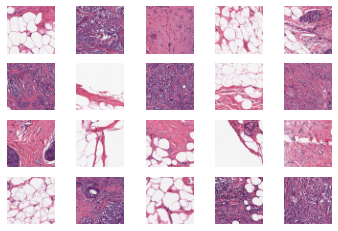

In [13]:
# Here we are calling the filepaths from the dataframe and then we are doing subplotting
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(pathframe.filepaths[vals]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [14]:
# Splitting the dataset into train and test images
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=42)
# Splitting the data into train and test
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=42)
# Splitting the training data again into training data and validation data
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(881, 2) (98, 2) (792, 2) (89, 2)


## Preprocessing the dataset

In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [16]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=False)
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=True)

Found 792 validated image filenames belonging to 2 classes.
Found 98 validated image filenames belonging to 2 classes.
Found 89 validated image filenames belonging to 2 classes.


In [17]:
print(train_gen.class_indices)

{'No': 0, 'Yes': 1}


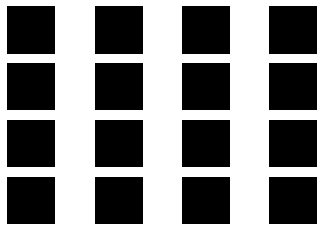

In [18]:
# Plotting the distorted images after adding noise
for i in range(0, 16):
    val = train_gen[0][0][0]
    vals = val.astype('uint8')
    plt.subplot(4, 4, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

## Transfer Learning

In [19]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [21]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history= model.fit(train_gen, validation_data= valid_gen, epochs=60, verbose=2)

Epoch 1/60
50/50 - 351s - loss: 0.5905 - accuracy: 0.7854 - val_loss: 193.8106 - val_accuracy: 0.7753 - 351s/epoch - 7s/step
Epoch 2/60
50/50 - 316s - loss: 0.3568 - accuracy: 0.8876 - val_loss: 7.6929 - val_accuracy: 0.7753 - 316s/epoch - 6s/step
Epoch 3/60
50/50 - 313s - loss: 0.2773 - accuracy: 0.9066 - val_loss: 0.5457 - val_accuracy: 0.6966 - 313s/epoch - 6s/step
Epoch 4/60
50/50 - 316s - loss: 0.2210 - accuracy: 0.9217 - val_loss: 0.3292 - val_accuracy: 0.8876 - 316s/epoch - 6s/step
Epoch 5/60
50/50 - 326s - loss: 0.2425 - accuracy: 0.9230 - val_loss: 0.4396 - val_accuracy: 0.8539 - 326s/epoch - 7s/step
Epoch 6/60
50/50 - 311s - loss: 0.2079 - accuracy: 0.9179 - val_loss: 0.3419 - val_accuracy: 0.8876 - 311s/epoch - 6s/step
Epoch 7/60
50/50 - 327s - loss: 0.1732 - accuracy: 0.9343 - val_loss: 0.4220 - val_accuracy: 0.9213 - 327s/epoch - 7s/step
Epoch 8/60
50/50 - 330s - loss: 0.2011 - accuracy: 0.9318 - val_loss: 0.2586 - val_accuracy: 0.8876 - 330s/epoch - 7s/step
Epoch 9/60
50/

In [23]:
model.evaluate(test_gen)

7/7 [==============================] - 8s 978ms/step - loss: 0.3322 - accuracy: 0.8571


[0.3322308659553528, 0.8571428656578064]

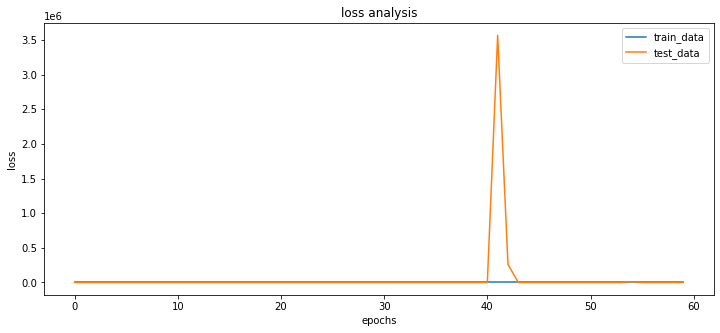

In [25]:
# Plotting loss analysis graph
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

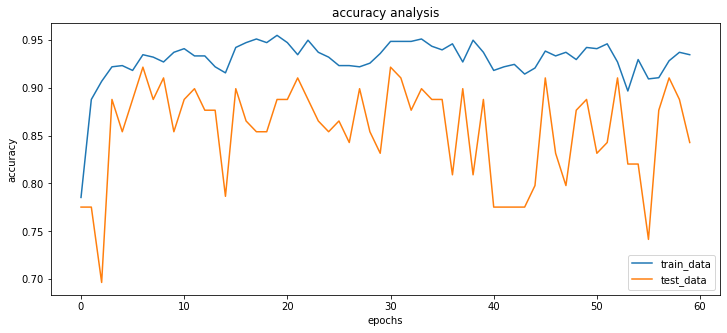

In [26]:
# Plotting accuracy analysis graph
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()